In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## overfitting

In [2]:
x=np.random.rand(6)
y=np.random.rand(6)

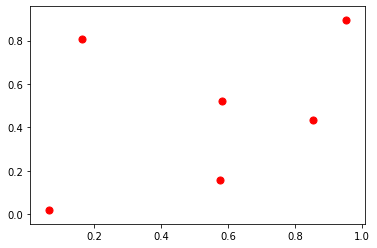

In [3]:
plt.scatter(x,y,c="r",s=50)

In [4]:
def myplot(n=1):
    plt.scatter(x,y,c="r",s=50)
    t=np.linspace(-0.2,1.2,1000)
    plt.plot(t,0.5*np.sin(n*t)+0.5)

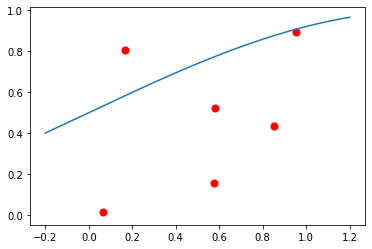

In [5]:
myplot()

In [6]:
from ipywidgets import interact

In [7]:
interact(myplot,n=(1,200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

## 線性回歸

$$f(x)=1.2x+0.8$$

In [8]:
x=np.linspace(0,5,200)

In [9]:
y=1.2*x+0.8+np.random.randn(200)

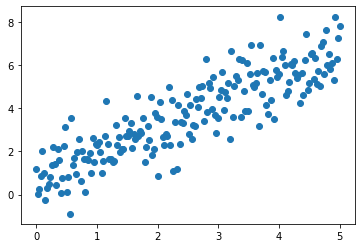

In [10]:
plt.scatter(x,y)

### 分訓練資料和測試資料

In [11]:
from sklearn.model_selection import train_test_split

### 小重點

機器學習(數據分析)，輸入資料是
$$[x_1,x_2,....]$$
喜歡放成
$$[[x_1],[x_2],...]$$


意思就是說本來n維向量，要變成n*1

In [12]:
x.shape

(200,)

In [13]:
x=x.reshape(200,1)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
len(x_train)

160

In [16]:
len(x_test)

40

## 準備做線性回歸

所有的函數學習，包括線性回歸、機器學習、神經網路都是做三部曲：

1.開一台函數學習機
2.訓練
3.預測

#### 建函數學習機

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

#### 訓練

In [19]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 預測

In [20]:
model.predict([[10]])

array([12.7369312])

In [21]:
model.predict([[10],[5]])

array([12.7369312 ,  6.74185455])

In [22]:
y_predict=model.predict(x_test)

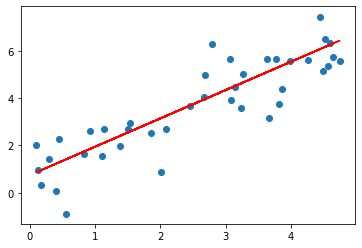

In [23]:
plt.scatter(x_test.ravel(),y_test)
plt.plot(x_test.ravel(),y_predict,'r')

## 預測波士頓房價

In [24]:
from sklearn.datasets import load_boston

In [25]:
boston_datasets=load_boston()

In [26]:
print(boston_datasets.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
len(boston_datasets.feature_names)

13

In [28]:
boston_datasets.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [29]:
boston=pd.DataFrame(boston_datasets.data,columns=boston_datasets.feature_names)

In [30]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
boston['MEDV']=boston_datasets.target

In [32]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
import seaborn as sns

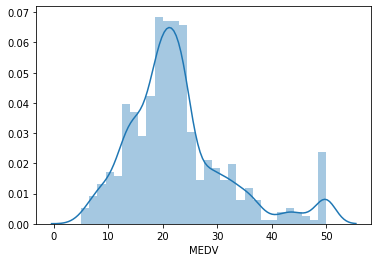

In [34]:
sns.distplot(boston.MEDV,bins=30)

### 準備訓練資料

In [35]:
X=boston.loc[:,"CRIM":"LSTAT"].values
Y=boston.MEDV

In [36]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
len(x_train)

404

In [39]:
len(x_test)

102

### 數據分析三部曲

1.開函數學習機

In [40]:
model=LinearRegression()

### 2.訓練

In [41]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3.預測

In [44]:
y_predict=model.predict(x_test)

In [45]:
y_predict-y_test

329     2.289638
371   -26.278589
219     6.364999
403     3.822386
78      0.243823
15     -0.616556
487    -0.103525
340     2.660993
310     2.796712
102     1.328066
418    -3.672965
411    -0.813260
446     2.177765
386    -4.906243
162   -10.003633
299     3.496547
480    -0.542012
196     3.551923
175     1.464011
37      2.151400
320     0.974958
171     5.571878
107     0.195438
278     1.253692
45      3.119407
367   -12.867334
21     -1.951831
153    -1.125803
97     -3.166375
113     2.260847
         ...    
65      7.228593
344    -2.368573
481     2.199571
387    -2.167482
233   -11.578168
206    -0.627328
90      4.668564
497     0.994922
239     5.323045
137     2.079788
407    -8.928140
224    -6.976023
225   -10.779874
326     0.712611
96      3.530762
426     5.685454
159     2.798458
391    -6.511804
54     -3.064840
435    -0.292244
254     2.815836
300     6.451653
505    10.266410
246    -4.049128
374   -13.209747
56      0.742171
455     1.471783
60     -0.7628

In [46]:
sns.set()

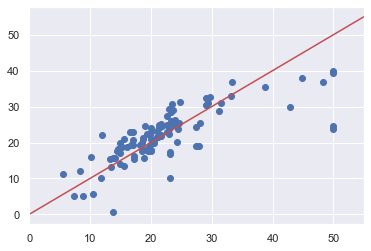

In [47]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.plot([0,55],[0,55],'r')

### 若點剛好在紅線上，代表x跟y是一樣的，真正的房價跟預測的房價是一樣的
### 若在上面為高估
### 若在下面為低估
# 大部分房子都預測正確，但此種做法比較貴的房子會低估

In [48]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [52]:
correlation_marix=boston.corr().round(2)

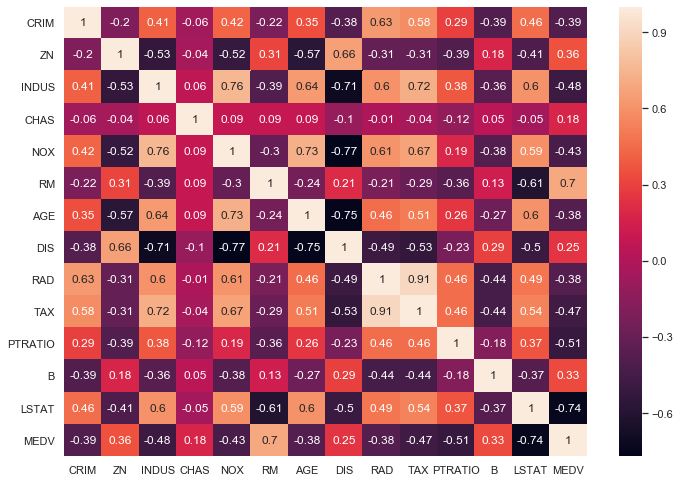

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_marix,annot=True)